<a href="https://colab.research.google.com/github/petrum01/EPFL-exts-AML1/blob/master/Yolov3_runnning_on_Colab_w_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# We will be using a forked version of Darknet which 
# allows us to suppress the display from OpenCV, when running
# object detection on videos
!ls
!rm -fr darknet
!git clone https://github.com/AlexeyAB/darknet/

sample_data
Cloning into 'darknet'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 8093 (delta 0), reused 2 (delta 0), pack-reused 8088
Receiving objects: 100% (8093/8093), 8.43 MiB | 5.22 MiB/s, done.
Resolving deltas: 100% (5426/5426), done.


In [6]:
!ls
%cd darknet
!ls
% cd ..

darknet  sample_data
/content/darknet
3rdparty    data	     Makefile	      scripts
build	    image_yolov2.sh  mjpeg_stream.sh  src
cfg	    image_yolov3.sh  net_cam_v3.sh    video_v2.sh
darknet.py  LICENSE	     README.md	      video_yolov3.sh
/content


In [7]:
#Installing CUDA pre-requisites
!wget https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb

--2018-12-29 10:29:22--  https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 192.229.189.146
Connecting to developer.nvidia.com (developer.nvidia.com)|192.229.189.146|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?hbQvvW0rVbjloNYnvQUpXjkJbB76ruiPQwKB0eIQmv4cevGnBNRuJF7hGdJi1QZ4oJpHJQ8P6JJtuDu591VcS34D_MLudm0YZM7oXy4L9b0UboMyfQwurFENrxeCQhsTDPOWWnDX7nWs0f8deNojjrAcMgs_L-EtAWRJbVFJfplbLZtfRMgQmd0ISN-lwK6kOL0Zio2RFAwnmfni0-l5NVgtRQ [following]
--2018-12-29 10:29:23--  https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?hbQvvW0rVbjloNYnvQUpXjkJbB76ruiPQwKB0eIQmv4cevGnBNRuJF7hGdJi1QZ4oJpHJQ8P6JJtuDu591VcS34D_MLu

In [8]:
!apt update

Get:1 file:/var/cuda-repo-8-0-local-ga2  InRelease
Ign:1 file:/var/cuda-repo-8-0-local-ga2  InRelease
Get:2 file:/var/cuda-repo-8-0-local-ga2  Release [574 B]
Get:2 file:/var/cuda-repo-8-0-local-ga2  Release [574 B]
Get:3 file:/var/cuda-repo-8-0-local-ga2  Release.gpg [819 B]
Get:3 file:/var/cuda-repo-8-0-local-ga2  Release.gpg [819 B]
Get:4 file:/var/cuda-repo-8-0-local-ga2  Packages [22.7 kB]
Ign:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  Release
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [83.2 kB]
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.

In [9]:
#Installing CUDA
!apt install cuda-8-0 -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  cuda-command-line-tools-8-0 cuda-core-8-0 cuda-cublas-8-0
  cuda-cublas-dev-8-0 cuda-cudart-8-0 cuda-cudart-dev-8-0 cuda-cufft-8-0
  cuda-cufft-dev-8-0 cuda-curand-8-0 cuda-curand-dev-8-0 cuda-cusolver-8-0
  cuda-cusolver-dev-8-0 cuda-cusparse-8-0 cuda-cusparse-dev-8-0
  cuda-demo-suite-8-0 cuda-documentation-8-0 cuda-driver-dev-8-0
  cuda-license-8-0 cuda-misc-headers-8-0 cuda-npp-8-0 cuda-npp-dev-8-0
  cuda-nvgraph-8-0 cuda-nvgraph-dev-8-0 cuda-nvml-dev-8-0 cuda-nvrtc-8-0
  cuda-nvrtc-dev-8-0 cuda-runtime-8-0 cuda-samples-8-0 cuda-toolkit-8-0
  cuda-visual-tools-8-0
The following NEW packages will be installed:
  cuda-8-0 cuda-command-line-tools-8-0 cuda-core-8-0 cuda-cublas-8-0
  cuda-cublas-dev-8-0 cuda-cudart-8-0 cuda-cudart-dev-8-0 cuda-cufft-8-0
  cuda-cufft-dev-8-0 cuda-curand-8-0 cuda-curand-dev-8-0 cuda-cusolver-8-0
  cuda-cuso

In [0]:
import os
os.environ['PATH'] += ':/usr/local/cuda/bin'

In [11]:
#Installing compilers
!apt install gcc-5 g++-5 -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  cpp-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0 libstdc++-5-dev
Suggested packages:
  gcc-5-locales g++-5-multilib gcc-5-doc libstdc++6-5-dbg gcc-5-multilib
  libgcc1-dbg libgomp1-dbg libitm1-dbg libatomic1-dbg libasan2-dbg
  liblsan0-dbg libtsan0-dbg libubsan0-dbg libcilkrts5-dbg libmpx0-dbg
  libquadmath0-dbg libstdc++-5-doc
The following NEW packages will be installed:
  cpp-5 g++-5 gcc-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0
  libstdc++-5-dev
0 upgraded, 9 newly installed, 0 to remove and 12 not upgraded.
Need to get 29.1 MB of archives.
After this operation, 100 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 gcc-5-base amd64 5.5.0-12ubuntu1 [17.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libisl15 amd64 0.18-4 [548 kB]
Get:3 http://arch

In [0]:
!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc 
!ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++

In [0]:
import os
os.environ['PATH'] += ':/usr/local/cuda/bin'

In [14]:
#Changing the variables to include OpenCV and GPU in the Makefile
% cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile
#!sed -i 's/CUDNN=0/CUDNN=1/g' Makefile

/content/darknet


In [15]:
!ls

3rdparty    data	     Makefile	      scripts
build	    image_yolov2.sh  mjpeg_stream.sh  src
cfg	    image_yolov3.sh  net_cam_v3.sh    video_v2.sh
darknet.py  LICENSE	     README.md	      video_yolov3.sh


In [16]:
# And this is how our Makefile looks now
# Check if OPENCV = 1 and GPU = 1
!head Makefile

GPU=1
CUDNN=0
CUDNN_HALF=0
OPENCV=1
AVX=0
OPENMP=0
LIBSO=0

# set GPU=1 and CUDNN=1 to speedup on GPU
# set CUDNN_HALF=1 to further speedup 3 x times (Mixed-precision on Tensor Cores) GPU: Volta, Xavier, Turing and higher


In [17]:
# Apparently we need to install this so that OpenCV can work without any issues
# when we are making the file
!apt-get install libopencv-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libopencv-dev is already the newest version (3.2.0+dfsg-4ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.


In [18]:
#Running make!
!make

mkdir -p obj
mkdir -p backup
mkdir -p results
g++  -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -Ofast -DOPENCV -DGPU -c ./src/http_stream.cpp -o obj/http_stream.o
./src/http_stream.cpp: In member function ‘bool MJPGWriter::write(const cv::Mat&)’:
./src/http_stream.cpp:186:23: warning: comparison between signed and unsigned integer expressions [-Wsign-compare]
                 if (n < outlen)
                       ^
gcc  -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -Ofast -DOPENCV -DGPU -c ./src/gemm.c -o obj/gemm.o
./src/gemm.c: In function ‘transpose_32x32_bits_my’:
./src/gemm.c:313:20: warning: unused variable ‘t’ [-Wunused-variable]
     unsigned x, y, t;
                    ^
./src/gemm.c: In function ‘transpose_8x8_bits_my’:
./src/gemm.c:391:20: warning: unused variable ‘t’ [-Wunused-variable]
     unsigne

In [19]:
# Downloading YOLO weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2018-12-29 10:33:07--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.3.39
Connecting to pjreddie.com (pjreddie.com)|128.208.3.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  23.3MB/s    in 11s     

2018-12-29 10:33:18 (21.3 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [20]:
# Let's see if it can detect object without any issues.
# Here is an example from YOLO
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

In [21]:
!ls

3rdparty  darknet.py	   Makefile	    README.md	 video_yolov3.sh
backup	  data		   mjpeg_stream.sh  results	 yolov3.weights
build	  image_yolov2.sh  net_cam_v3.sh    scripts
cfg	  image_yolov3.sh  obj		    src
darknet   LICENSE	   predictions.jpg  video_v2.sh


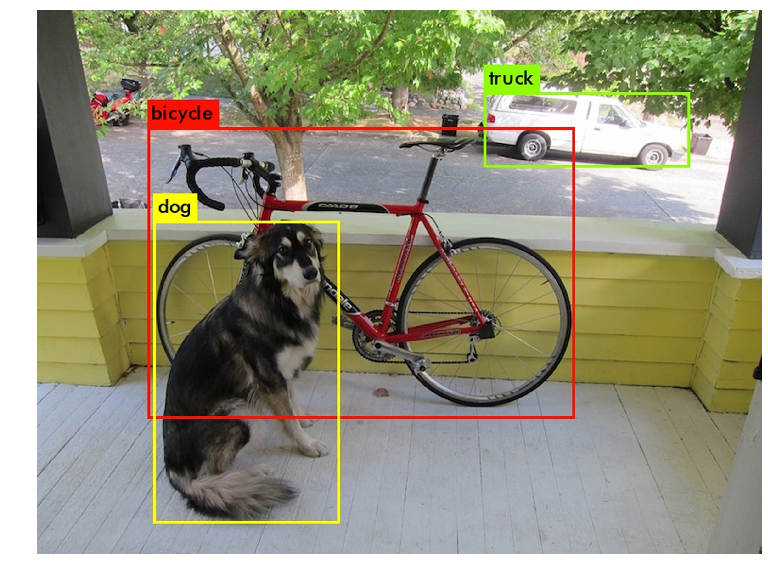

In [22]:
#The DOG, The TRUCK and The Bicycle!
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread("predictions.jpg")
height, width = image.shape[:2]
resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
#plt.rcParams['figure.figsize'] = [10, 5]
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

In [25]:
# Upload the video you want to use for object detection
# Please use a filename without spaces like test.mp4 etc.
%cd data
!ls
from google.colab import files
uploaded = files.upload() 
for name, data in uploaded.items():
  with open(name, 'wb') as f:
    f.write(data)
    print ('saved file', name)

[Errno 2] No such file or directory: 'data'
/content/darknet/data
9k.tree     eagle.jpg	 imagenet.labels.list	   person.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  scream.jpg
coco.names  goal.txt	 labels			   voc.names
dog.jpg     horses.jpg	 openimages.names


Saving alma.mp4 to alma.mp4
saved file alma.mp4


In [0]:
# And finally run it! Please check if you have given the right video file name
%cd
%cd /content/darknet
!ls
!./darknet detector demo cfg/coco.data cfg/yolov3.cfg yolov3.weights -dont_show data/alma.mp4 -i 0 -out_filename res.avi

In [36]:
# Download the resulting video
!ls -all
files.download('res.avi')

total 255480
drwxr-xr-x 13 root root      4096 Dec 29 10:46 .
drwxr-xr-x  1 root root      4096 Dec 29 10:29 ..
drwxr-xr-x  5 root root      4096 Dec 29 10:29 3rdparty
drwxr-xr-x  2 root root      4096 Dec 29 10:31 backup
drwxr-xr-x  3 root root      4096 Dec 29 10:29 build
drwxr-xr-x  3 root root      4096 Dec 29 10:29 cfg
drwxr-xr-x  2 root root      4096 Dec 29 10:29 .circleci
-rwxr-xr-x  1 root root   2808360 Dec 29 10:33 darknet
-rw-r--r--  1 root root     15850 Dec 29 10:29 darknet.py
drwxr-xr-x  3 root root      4096 Dec 29 10:41 data
drwxr-xr-x  8 root root      4096 Dec 29 10:29 .git
-rw-r--r--  1 root root       271 Dec 29 10:29 .gitignore
-rw-r--r--  1 root root       108 Dec 29 10:29 image_yolov2.sh
-rw-r--r--  1 root root       110 Dec 29 10:29 image_yolov3.sh
-rw-r--r--  1 root root       515 Dec 29 10:29 LICENSE
-rw-r--r--  1 root root      4544 Dec 29 10:31 Makefile
-rw-r--r--  1 root root       245 Dec 29 10:29 mjpeg_stream.sh
-rw-r--r--  1 root root       159 Dec 29 1

In [37]:
# Upload gopro video
%cd data
!ls
from google.colab import files
uploaded = files.upload() 
for name, data in uploaded.items():
  with open(name, 'wb') as f:
    f.write(data)
    print ('saved file', name)

/content/darknet/data
9k.tree     dog.jpg	 horses.jpg		   openimages.names
alma.mp4    eagle.jpg	 imagenet.labels.list	   person.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  scream.jpg
coco.names  goal.txt	 labels			   voc.names


Saving GP030460.MP4 to GP030460.MP4
saved file GP030460.MP4


In [43]:
%%time
# And finally run it! Please check if you have given the right video file name
%cd
%cd /content/darknet
!ls
!./darknet detector demo cfg/coco.data cfg/yolov3.cfg yolov3.weights -dont_show data/GP030460.MP4 -i 0 -out_filename res.avi

/root
/content/darknet
3rdparty  darknet.py	   Makefile	    README.md  video_v2.sh
backup	  data		   mjpeg_stream.sh  res.avi    video_yolov3.sh
build	  image_yolov2.sh  net_cam_v3.sh    results    yolov3.weights
cfg	  image_yolov3.sh  obj		    scripts
darknet   LICENSE	   predictions.jpg  src
Demo
layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x

In [45]:
# Download the resulting video
!ls -all
files.download('res.avi')

total 257472
drwxr-xr-x 13 root root      4096 Dec 29 10:46 .
drwxr-xr-x  1 root root      4096 Dec 29 10:29 ..
drwxr-xr-x  5 root root      4096 Dec 29 10:29 3rdparty
drwxr-xr-x  2 root root      4096 Dec 29 10:31 backup
drwxr-xr-x  3 root root      4096 Dec 29 10:29 build
drwxr-xr-x  3 root root      4096 Dec 29 10:29 cfg
drwxr-xr-x  2 root root      4096 Dec 29 10:29 .circleci
-rwxr-xr-x  1 root root   2808360 Dec 29 10:33 darknet
-rw-r--r--  1 root root     15850 Dec 29 10:29 darknet.py
drwxr-xr-x  3 root root      4096 Dec 29 10:54 data
drwxr-xr-x  8 root root      4096 Dec 29 10:29 .git
-rw-r--r--  1 root root       271 Dec 29 10:29 .gitignore
-rw-r--r--  1 root root       108 Dec 29 10:29 image_yolov2.sh
-rw-r--r--  1 root root       110 Dec 29 10:29 image_yolov3.sh
-rw-r--r--  1 root root       515 Dec 29 10:29 LICENSE
-rw-r--r--  1 root root      4544 Dec 29 10:31 Makefile
-rw-r--r--  1 root root       245 Dec 29 10:29 mjpeg_stream.sh
-rw-r--r--  1 root root       159 Dec 29 1